# Machine Learning, Assignment - 6
## <div class="alert alert-info"><b>Spam filtering</b></div>

<div class="alert alert-info"> Spam filtering is an example of document classification task which involves classifying an email / SMS as spam or non-spam (a.k.a. ham). </div>


## Imports

In [1]:
import os
import numpy as np
import pandas as pd
from IPython.display import Image

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


<div class="alert alert-info"> 1. Import the dataset from https://archive.ics.uci.edu/ml/datasets/Spambase (1 point).  sms-spam-collection-dataset.zip . </div>



In [2]:
dataset = pd.read_csv("C:\Seetha\data\spam.csv", encoding = "ISO-8859-1")
dataset = dataset[["v1","v2"]]
dataset = dataset.replace({'ham':0, 'spam':1})
print(dataset.shape)
dataset.head()


(5572, 2)


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<div class="alert alert-info"> 2. Split the data into training and testing. (1 point) Optionally you can use 10-fold cross validation. </div>

In [3]:
x = dataset["v2"]
y = dataset["v1"]

x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.20, stratify=y, random_state = 17)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4457,) (1115,) (4457,) (1115,)


<div class="alert alert-info"> 3. Extract features using TF-IDF and display the features. ( 2 points)</div>

In [4]:
vectorizer = TfidfVectorizer(min_df=5, max_df = 0.8, sublinear_tf=True, use_idf =True, stop_words = 'english')
train_corpus_tf_idf = vectorizer.fit_transform(x_train)
test_corpus_tf_idf = vectorizer.transform(x_test)

<div class="alert alert-info"> 4. Model the classifier using GaussianNB, BernoulliNB and MultinomialNB.  </div>

<div class="alert alert-info"> 5. Train the classifiers.( 3 points) </div>

In [5]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(train_corpus_tf_idf.toarray(),y_train)
print(BernNB)

GaussNB = GaussianNB()
GaussNB.fit(train_corpus_tf_idf.toarray(),y_train)
print(GaussNB)

MultiNB = MultinomialNB()
MultiNB.fit(train_corpus_tf_idf.toarray(),y_train)
print(MultiNB)

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
GaussianNB(priors=None, var_smoothing=1e-09)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


<div class="alert alert-info"> 6. Evaluate classifiers on Test Data. ( 2 points) </div>

In [6]:
from sklearn.metrics import accuracy_score

y_predict = BernNB.predict(test_corpus_tf_idf.toarray())
print('BernoulliNB', accuracy_score(y_test,y_predict)*100)

y_predict = GaussNB.predict(test_corpus_tf_idf.toarray())
print('GaussianNB', accuracy_score(y_test,y_predict)*100)

y_predict = MultiNB.predict(test_corpus_tf_idf.toarray())
print('MultinomialNB', accuracy_score(y_test,y_predict)*100)

BernoulliNB 86.63677130044843
GaussianNB 81.0762331838565
MultinomialNB 97.66816143497758


<div class="alert alert-info"> 7. Report the classifier accuracy, polarity score for each sentence for all the classifiers. For example, this paragraph has probability of 60% being spam or vice versa. ( 2 points) </div>

In [7]:
# predict_proba() function of sklearn library for any model like Logistic or Naive Bayes
# would give probability scores of both classes.
print('Bernnoulli NB')
print(BernNB.predict_proba(test_corpus_tf_idf.toarray()))

print('Gaussuan NB')
print(GaussNB.predict_proba(test_corpus_tf_idf.toarray()))

print('Multinomial NB')
print(MultiNB.predict_proba(test_corpus_tf_idf.toarray()))

Bernnoulli NB
[[0.97773567 0.02226433]
 [0.97773567 0.02226433]
 [0.97773567 0.02226433]
 ...
 [0.97773567 0.02226433]
 [0.97773567 0.02226433]
 [0.97773567 0.02226433]]
Gaussuan NB
[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]
Multinomial NB
[[0.96563753 0.03436247]
 [0.9542839  0.0457161 ]
 [0.94543534 0.05456466]
 ...
 [0.75350153 0.24649847]
 [0.99847125 0.00152875]
 [0.0065583  0.9934417 ]]


<div class="alert alert-info"> 8. Display and visualize the word cloud of both the classes. For example, Display word clouds for Spam vs Legitimate word clouds. It should show the frequent words coming in respective classes. ( 2 points)</div>

In [8]:
from wordcloud import WordCloud, STOPWORDS

def generate_word_cloud(text):
    stopwords = STOPWORDS
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)    
    #storing the wordcloud in image "wc.png"
    wordcloud.to_file('wc.png')
    return 'wc.png'

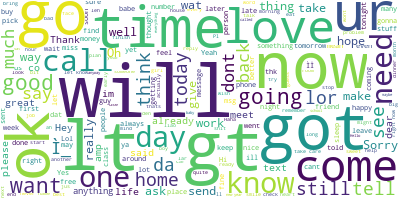

In [9]:
# Generating HAM class wordcloud from training data
generate_word_cloud("".join(dataset.loc[dataset['v1'] == 0]["v2"].tolist()))
Image("wc.png")

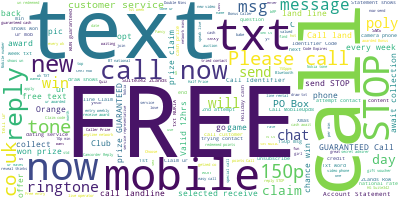

In [10]:
# Generating SPAM class wordcloud from training data
generate_word_cloud("".join(dataset.loc[dataset['v1'] == 1]["v2"].tolist()))
Image("wc.png")